# Installs

In [1]:
#pip install requests #enable if necessary

# Import Libraries

In [2]:
import requests
import os
import folium
import zipfile
import time
import pandas as pd
import numpy as np
import geopandas as gpd
import json
from shapely.geometry import shape
from IPython.display import IFrame
from shapely.geometry import Point
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
from folium import Choropleth

# Connect to City of Toronto Database APIs

This part outlines how to connect to City of Toronto Open Database. It runs a function to fetch and save resources available in the datasets. Commented out code below grabs all information available. Aftre careful review of data available, second code below was modified to pull only selected files.

In [3]:
# # Define API endpoints for the datasets
# api_endpoints = {
#     "Neighbourhood Profiles": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=neighbourhood-profiles",
#     "Neighbourhoods": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=neighbourhoods",
#     "Homeless Shelters": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=drop-in-locations-toronto-drop-in-network-members-tdin",
#     "Schools": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=school-locations-all-types",
#     "Parks and Recreational Facilities": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=parks-and-recreation-facilities",
#     "Development Applications": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=development-applications"
# }

# # Directory to save the datasets
# output_dir = "toronto_datasets_api"
# os.makedirs(output_dir, exist_ok=True)

# # Function to fetch dataset details and download resources
# def fetch_and_save_dataset(api_url, dataset_name):
#     response = requests.get(api_url)
#     if response.status_code == 200:
#         data = response.json()
#         resources = data.get("result", {}).get("resources", [])
        
#         if resources:
#             for resource in resources:
#                 download_url = resource.get("url")
#                 file_name = resource.get("name", "resource").replace(" ", "_")
#                 file_path = os.path.join(output_dir, f"{dataset_name}_{file_name}")
                
#                 if download_url:
#                     print(f"Downloading {file_name} from {download_url}...")
#                     resource_response = requests.get(download_url)
#                     if resource_response.status_code == 200:
#                         with open(file_path, "wb") as file:
#                             file.write(resource_response.content)
#                         print(f"Saved to {file_path}")
#                     else:
#                         print(f"Failed to download {file_name}")
#         else:
#             print(f"No resources found for {dataset_name}")
#     else:
#         print(f"Failed to fetch dataset details for {dataset_name}. Status code: {response.status_code}")

# # Process each dataset
# for name, api_url in api_endpoints.items():
#     print(f"Processing {name}...")
#     fetch_and_save_dataset(api_url, name.replace(" ", "_"))

The code below fetches only certain files from the the Toronto Database. 
From "Development Applications" we want to pull csv file. 
From "Homeless Shelters" we pull everythin.
From "Neighbourhood Profiles" we pull only csv file and the most recent one.
From "Neighbourhoods", "Schools", and "Parks_and_Recreational_Facilities" we pull CSV file, ZIP file, and all of them should be with "4326" extension for global mapping. 

In [4]:
# Define API endpoints for the datasets
api_endpoints = {
    "Development Applications": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=development-applications",
    "Homeless Shelters": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=drop-in-locations-toronto-drop-in-network-members-tdin",
    "Neighbourhood Profiles": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=neighbourhood-profiles",
    "Neighbourhoods": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=neighbourhoods",
    "Schools": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=school-locations-all-types",
    "Parks and Recreational Facilities": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=parks-and-recreation-facilities",
}

# Directory to save the datasets
output_dir = "toronto_datasets_api"
os.makedirs(output_dir, exist_ok=True)

# Function to fetch dataset details and download resources
def fetch_and_save_dataset(api_url, dataset_name):
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        resources = data.get("result", {}).get("resources", [])
        
        if resources:
            for resource in resources:
                # Fetching the required files based on conditions
                download_url = resource.get("url")
                file_name = resource.get("name", "resource").replace(" ", "_").lower()
                file_path = os.path.join(output_dir, f"{dataset_name}_{file_name}")
                
                # Define filters based on your requirements
                if dataset_name == "Development_Applications" and file_name.endswith(".csv"):
                    pass
                elif dataset_name == "Neighbourhood_Profiles" and file_name.endswith(".csv") and "2016" in file_name:
                    pass
                elif dataset_name == "Neighbourhoods" and "historical" not in file_name and file_name.endswith((".csv", ".zip")) and "4326" in file_name:
                    pass
                elif dataset_name in ["Schools", "Parks_and_Recreational_Facilities"] and file_name.endswith((".csv", ".zip")) and "4326" in file_name:
                    pass
                elif dataset_name == "Homeless_Shelters":
                    pass
                else:
                    continue

                # Download the selected file
                if download_url:
                    print(f"Downloading {file_name} from {download_url}...")
                    resource_response = requests.get(download_url)
                    if resource_response.status_code == 200:
                        with open(file_path, "wb") as file:
                            file.write(resource_response.content)
                        print(f"Saved to {file_path}")
                    else:
                        print(f"Failed to download {file_name}")
        else:
            print(f"No resources found for {dataset_name}")
    else:
        print(f"Failed to fetch dataset details for {dataset_name}. Status code: {response.status_code}")

# Process each dataset
for name, api_url in api_endpoints.items():
    print(f"Processing {name}...")
    fetch_and_save_dataset(api_url, name.replace(" ", "_"))

Processing Development Applications...
Saved to toronto_datasets_api\Development_Applications_development_applications.csv
Processing Homeless Shelters...
Saved to toronto_datasets_api\Homeless_Shelters_drop-in-wgs84
Saved to toronto_datasets_api\Homeless_Shelters_drop-in-readme
Processing Neighbourhood Profiles...
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2016-140-model.csv
Processing Neighbourhoods...
Saved to toronto_datasets_api\Neighbourhoods_neighbourhoods_-_4326.zip
Saved to toronto_datasets_api\Neighbourhoods_neighbourhoods_-_4326.csv
Processing Schools...
Saved to toronto_datasets_api\Schools_school_locations-all_types_data_-_4326.csv
Saved to toronto_datasets_api\Schools_school_locations-all_types_data_-_4326.zip
Processing Parks and Recreational Facilities...
Saved to toronto_datasets_api\Parks_and_Recreational_Facilities_parks_and_recreation_facilities_-_4326.csv
Saved to toronto_datasets_api\Parks_and_Recreational_Facilities_parks_and_recr

Next we want to load in all CSV files and turn them into dataframes.

In [5]:
# Directory containing the saved datasets
output_dir = "toronto_datasets_api"

# Dictionary to store DataFrames
dataframes = {}

# Iterate through files in the output directory
for file_name in os.listdir(output_dir):
    file_path = os.path.join(output_dir, file_name)
    
    # Check if the file is a CSV
    if file_name.endswith(".csv"):
        try:
            # Load CSV into a DataFrame
            df = pd.read_csv(file_path)
            
            # Store the DataFrame in the dictionary using a cleaned-up name
            dataset_name = file_name.replace(".csv", "").replace("_", " ").title()
            dataframes[dataset_name] = df
            
            print(f"Loaded {file_name} into DataFrame. Shape: {df.shape}")
        except Exception as e:
            print(f"Failed to load {file_name}: {e}")

# Display summary of loaded DataFrames
print("\nSummary of Loaded DataFrames:")
for name, df in dataframes.items():
    print(f"{name}: {df.shape}")

Loaded development_applications_cleaned_geocoded.csv into DataFrame. Shape: (24140, 6)
Loaded Development_Applications_development_applications.csv into DataFrame. Shape: (24216, 26)
Loaded Neighbourhoods_neighbourhoods_-_4326.csv into DataFrame. Shape: (158, 12)
Loaded Neighbourhood_Profiles_neighbourhood-profiles-2016-140-model.csv into DataFrame. Shape: (2383, 146)
Loaded Parks_and_Recreational_Facilities_parks_and_recreation_facilities_-_4326.csv into DataFrame. Shape: (1663, 10)
Loaded Schools_school_locations-all_types_data_-_4326.csv into DataFrame. Shape: (1194, 25)

Summary of Loaded DataFrames:
Development Applications Cleaned Geocoded: (24140, 6)
Development Applications Development Applications: (24216, 26)
Neighbourhoods Neighbourhoods - 4326: (158, 12)
Neighbourhood Profiles Neighbourhood-Profiles-2016-140-Model: (2383, 146)
Parks And Recreational Facilities Parks And Recreation Facilities - 4326: (1663, 10)
Schools School Locations-All Types Data - 4326: (1194, 25)


# Prepare Dataframes

Starting one by one, we need to prepare dataframes for further analysis. 

# Dataframe 1 - Development Applications

Let's take a look at list of columnts and see if all necessary for our analysis.

In [6]:
# Display the list of columns for the Development Applications DataFrame
development_df_name = "Development Applications Development Applications"  # Replace with exact DataFrame name
if development_df_name in dataframes:
    development_df = dataframes[development_df_name]
    print("List of columns in Development Applications DataFrame:")
    print(development_df.columns.tolist())
else:
    print(f"DataFrame '{development_df_name}' not found.")

List of columns in Development Applications DataFrame:
['_id', 'APPLICATION_TYPE', 'APPLICATION#', 'STREET_NUM', 'STREET_NAME', 'STREET_TYPE', 'STREET_DIRECTION', 'POSTAL', 'DATE_SUBMITTED', 'STATUS', 'HEARING_DATE', 'X', 'Y', 'DESCRIPTION', 'REFERENCE_FILE#', 'FOLDERRSN', 'WARD_NUMBER', 'WARD_NAME', 'COMMUNITY_MEETING_DATE', 'COMMUNITY_MEETING_TIME', 'COMMUNITY_MEETING_LOCATION', 'APPLICATION_URL', 'CONTACT_NAME', 'CONTACT_PHONE', 'CONTACT_EMAIL', 'PARENT_FOLDER_NUMBER']


We do not need following columns and they can be removed from or dataframe: '_id', 'APPLICATION_TYPE', 'APPLICATION#', 'STREET_TYPE', 'DATE_SUBMITTED', 'STATUS', 'HEARING_DATE', 'X', 'Y', 'DESCRIPTION', 'REFERENCE_FILE#', 'FOLDERRSN', 'COMMUNITY_MEETING_DATE', 'COMMUNITY_MEETING_TIME', 'COMMUNITY_MEETING_LOCATION', 'APPLICATION_URL', 'CONTACT_NAME', 'CONTACT_PHONE', 'CONTACT_EMAIL', 'PARENT_FOLDER_NUMBER'

In [7]:
# List of columns to remove
columns_to_remove = [
    '_id', 'APPLICATION_TYPE', 'APPLICATION#', 'STREET_TYPE', 'DATE_SUBMITTED', 'STATUS', 'HEARING_DATE', 
    'X', 'Y', 'DESCRIPTION', 'REFERENCE_FILE#', 'FOLDERRSN', 
    'COMMUNITY_MEETING_DATE', 'COMMUNITY_MEETING_TIME', 
    'COMMUNITY_MEETING_LOCATION', 'APPLICATION_URL', 
    'CONTACT_NAME', 'CONTACT_PHONE', 'CONTACT_EMAIL', 'PARENT_FOLDER_NUMBER'
]

# Check if the Development Applications DataFrame exists in the dictionary
development_df_name = "Development Applications Development Applications"
if development_df_name in dataframes:
    development_df = dataframes[development_df_name]
    
    # Drop the specified columns
    development_df_cleaned = development_df.drop(columns=columns_to_remove, errors='ignore')
    
    # Update the DataFrame in the dictionary
    dataframes[development_df_name] = development_df_cleaned
    
    print(f"Columns removed. Updated shape: {development_df_cleaned.shape}")
    print("Remaining columns:")
    print(development_df_cleaned.columns.tolist())
else:
    print(f"DataFrame '{development_df_name}' not found.")

Columns removed. Updated shape: (24216, 6)
Remaining columns:
['STREET_NUM', 'STREET_NAME', 'STREET_DIRECTION', 'POSTAL', 'WARD_NUMBER', 'WARD_NAME']


Next need to check if any information is missing.

In [8]:
# Check for missing values in the Development Applications DataFrame
if development_df_name in dataframes:
    development_df_cleaned = dataframes[development_df_name]
    
    # Get a summary of missing values
    missing_summary = development_df_cleaned.isnull().sum()
    missing_info = missing_summary[missing_summary > 0]
    
    if missing_info.empty:
        print("No missing values found in the Development Applications DataFrame.")
    else:
        print("Missing values found in the Development Applications DataFrame:")
        print(missing_info)
else:
    print(f"DataFrame '{development_df_name}' not found.")

Missing values found in the Development Applications DataFrame:
WARD_NUMBER    10
WARD_NAME      76
dtype: int64


Now need remove rows with missing data.

In [9]:
# Remove rows with missing data from the Development Applications DataFrame
if development_df_name in dataframes:
    development_df_cleaned = dataframes[development_df_name]
    
    # Drop rows with missing values
    development_df_cleaned = development_df_cleaned.dropna()

    # Update the DataFrame in the dictionary
    dataframes[development_df_name] = development_df_cleaned
    
    print(f"Rows with missing data removed. New shape: {development_df_cleaned.shape}")
else:
    print(f"DataFrame '{development_df_name}' not found.")

Rows with missing data removed. New shape: (24140, 6)


Now, with cleaned up data, we want to visualize the density of development applications on the map of Toronto.
First, we shall geocode each address. This step might take some time, don't get worried. Also, make sure that your connection to internet stays on.
Second create a map.

In [10]:
# # Initialize geolocator
# geolocator = Nominatim(user_agent="toronto_development_geocoder")

# # Function to geocode an address
# def geocode_address(row):
#     try:
#         address = f"{row['STREET_NUM']} {row['STREET_NAME']} {row['STREET_DIRECTION']}, Toronto, Canada"
#         location = geolocator.geocode(address, timeout=10)
#         if location:
#             return (location.latitude, location.longitude)
#     except GeocoderTimedOut:
#         time.sleep(1)  # Wait a second and retry
#         return geocode_address(row)
#     return (None, None)

# # Geocode the Development Applications DataFrame
# if development_df_name in dataframes:
#     development_df_cleaned = dataframes[development_df_name]

#     # Apply geocoding to each row
#     print("Geocoding addresses...")
#     development_df_cleaned[["LAT", "LON"]] = development_df_cleaned.apply(
#         lambda row: pd.Series(geocode_address(row)), axis=1
#     )
#     print("Geocoding completed.")
    
#     # Drop rows with missing geocoded values
#     development_df_cleaned = development_df_cleaned.dropna(subset=["LAT", "LON"])
    
#     # Convert to a GeoDataFrame
#     development_gdf = gpd.GeoDataFrame(
#         development_df_cleaned,
#         geometry=gpd.points_from_xy(development_df_cleaned["LON"], development_df_cleaned["LAT"]),
#         crs="EPSG:4326"
#     )

#     # Visualization using Folium
#     toronto_map = folium.Map(location=[43.7, -79.4], zoom_start=11)

#     # Add points to the map
#     for _, row in development_gdf.iterrows():
#         folium.CircleMarker(
#             location=[row.geometry.y, row.geometry.x],
#             radius=3,
#             color="blue",
#             fill=True,
#             fill_opacity=0.6
#         ).add_to(toronto_map)

#     # Save and display the map
#     toronto_map.save("toronto_development_density.html")
#     print("Map has been saved as 'toronto_development_density.html'.")
# else:
#     print(f"DataFrame '{development_df_name}' not found.")

Since Geocoding is a time consuming process, we will save the cuurent Development Application fime as a CSV so in case we need to re-run a kernl we can just pull that database instead of going though geocoding again. 

In [11]:
# Save the cleaned and geocoded DataFrame to a CSV file
output_csv_path = os.path.join(output_dir, "development_applications_cleaned_geocoded.csv")

if development_df_name in dataframes:
    development_df_cleaned = dataframes[development_df_name]
    development_df_cleaned.to_csv(output_csv_path, index=False)
    print(f"Cleaned and geocoded dataset saved to: {output_csv_path}")
else:
    print(f"DataFrame '{development_df_name}' not found.")

Cleaned and geocoded dataset saved to: toronto_datasets_api\development_applications_cleaned_geocoded.csv


Now let's review the dataframe and see if it is ready for merge based on geometry and locations.

In [12]:
# Load the saved geocoded dataset
geocoded_csv_path = os.path.join(output_dir, "development_applications_cleaned_geocoded.csv")
geocoded_df = pd.read_csv(geocoded_csv_path)

print("Geocoded dataset loaded successfully.")
print(geocoded_df.head())

Geocoded dataset loaded successfully.


  STREET_NUM STREET_NAME STREET_DIRECTION POSTAL  WARD_NUMBER  \
0       2681    DANFORTH                     M4C           19   
1         50       LAING                     M4L           14   
2         23     TORONTO                     M5C           13   
3          5     JOPLING                S    M9B            3   
4          0      EXMOOR                                    3   

             WARD_NAME  
0    Beaches-East York  
1     Toronto-Danforth  
2       Toronto Centre  
3  Etobicoke-Lakeshore  
4  Etobicoke-Lakeshore  


In [13]:
# Path to the saved map
map_path = "toronto_development_density.html"

# Display the map in the notebook
IFrame(map_path, width=800, height=600)

# Dataframe 2 - Neighbourhood Shapes

Let's prepare another dataframe with Neighbourhood shape information. Let's review the file and see what information it offers to us.

In [14]:
# Display the list of columns for the Neighbourhoods DataFrame
neighbourhoods_df_name = "Neighbourhoods Neighbourhoods - 4326"
if neighbourhoods_df_name in dataframes:
    neighbourhoods_df = dataframes[neighbourhoods_df_name]
    print("List of columns in Neighbourhoods DataFrame:")
    print(neighbourhoods_df.columns.tolist())
else:
    print(f"DataFrame '{neighbourhoods_df_name}' not found.")

List of columns in Neighbourhoods DataFrame:
['_id', 'AREA_ID', 'AREA_ATTR_ID', 'PARENT_AREA_ID', 'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'AREA_NAME', 'AREA_DESC', 'CLASSIFICATION', 'CLASSIFICATION_CODE', 'OBJECTID', 'geometry']


We do not need following columns and they can be removed from or dataframe: 'AREA_ATTR_ID', 'PARENT_AREA_ID', 'CLASSIFICATION_CODE', 'AREA_DESC'. Let's keep remaining columns for now as they might be useful during dataframes merge. 

In [15]:
# List of columns to remove
columns_to_remove_neighbourhoods = [
    'AREA_ATTR_ID', 'PARENT_AREA_ID', 'CLASSIFICATION_CODE', 'AREA_DESC'
]

# Check if the Neighbourhoods DataFrame exists in the dictionary
neighbourhoods_df_name = "Neighbourhoods Neighbourhoods - 4326"
if neighbourhoods_df_name in dataframes:
    neighbourhoods_df = dataframes[neighbourhoods_df_name]
    
    # Drop the specified columns
    neighbourhoods_df_cleaned = neighbourhoods_df.drop(columns=columns_to_remove_neighbourhoods, errors='ignore')
    
    # Update the DataFrame in the dictionary
    dataframes[neighbourhoods_df_name] = neighbourhoods_df_cleaned
    
    print(f"Columns removed. Updated shape: {neighbourhoods_df_cleaned.shape}")
    print("Remaining columns:")
    print(neighbourhoods_df_cleaned.columns.tolist())
else:
    print(f"DataFrame '{neighbourhoods_df_name}' not found.")

Columns removed. Updated shape: (158, 8)
Remaining columns:
['_id', 'AREA_ID', 'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'AREA_NAME', 'CLASSIFICATION', 'OBJECTID', 'geometry']


Next need to check if any information is missing.

In [16]:
# Check for missing values in the Neighbourhoods DataFrame
if neighbourhoods_df_name in dataframes:
    neighbourhoods_df_cleaned = dataframes[neighbourhoods_df_name]
    
    # Get a summary of missing values
    missing_summary = neighbourhoods_df_cleaned.isnull().sum()
    missing_info = missing_summary[missing_summary > 0]
    
    if missing_info.empty:
        print("No missing values found in the Neighbourhoods DataFrame.")
    else:
        print("Missing values found in the Neighbourhoods DataFrame:")
        print(missing_info)
else:
    print(f"DataFrame '{neighbourhoods_df_name}' not found.")

No missing values found in the Neighbourhoods DataFrame.


Now need remove rows with missing data.

In [17]:
# Remove rows with missing data from the Neighbourhoods DataFrame
if neighbourhoods_df_name in dataframes:
    neighbourhoods_df_cleaned = dataframes[neighbourhoods_df_name]
    
    # Drop rows with missing values
    neighbourhoods_df_cleaned = neighbourhoods_df_cleaned.dropna()
    
    # Update the DataFrame in the dictionary
    dataframes[neighbourhoods_df_name] = neighbourhoods_df_cleaned
    
    print(f"Rows with missing data removed. New shape: {neighbourhoods_df_cleaned.shape}")
else:
    print(f"DataFrame '{neighbourhoods_df_name}' not found.")

Rows with missing data removed. New shape: (158, 8)


Here, we want to see how we can merge the dataframes. 

# Dataframe 3 - Neighbourhood Profiles

Let's prepare another dataframe with Neighbourhood Profiles information. Let's review the file and see what information it offers to us. Let's take a look at list of columnts and see if all necessary for our analysis.

In [18]:
# Display the head, size, and info for the Neighbourhood Profiles DataFrame
neighbourhood_profiles_df_name = "Neighbourhood Profiles Neighbourhood-Profiles-2016-140-Model"

if neighbourhood_profiles_df_name in dataframes:
    neighbourhood_profiles_df = dataframes[neighbourhood_profiles_df_name]
    
    # Display the size of the DataFrame
    print(f"Initial size of the DataFrame: {neighbourhood_profiles_df.shape}")
    
    # Display head
    print("\nHead of the DataFrame:")
    print(neighbourhood_profiles_df.head())
    
    # Display info
    print("\nInfo of the DataFrame:")
    neighbourhood_profiles_df.info()
else:
    print(f"DataFrame '{neighbourhood_profiles_df_name}' not found.")

Initial size of the DataFrame: (2383, 146)

Head of the DataFrame:
   _id                   Category                      Topic  \
0    1  Neighbourhood Information  Neighbourhood Information   
1    2  Neighbourhood Information  Neighbourhood Information   
2    3                 Population   Population and dwellings   
3    4                 Population   Population and dwellings   
4    5                 Population   Population and dwellings   

                      Data Source               Characteristic  \
0                 City of Toronto         Neighbourhood Number   
1                 City of Toronto         TSNS2020 Designation   
2  Census Profile 98-316-X2016001             Population, 2016   
3  Census Profile 98-316-X2016001             Population, 2011   
4  Census Profile 98-316-X2016001  Population Change 2011-2016   

  City of Toronto Agincourt North Agincourt South-Malvern West  \
0             NaN             129                          128   
1             NaN  

The dataframe is very large and perhaps we do not need every bit of information available in there for our analysis. Now we need to remove unecessary information from it. Lets remove all entreies related to the "language", "Immigration and citizenship", "Visible minority", "Mobility", "Labour", "Ethnic origin", "Journey to work", "Families, households and marital status" and "Housing" under Category.

In [19]:
# Step 1 Remove unnecessary entries
if "Category" in neighbourhood_profiles_df.columns:
    # Combine patterns for unnecessary categories
    patterns = r"language|education|immigration and citizenship|visible minority|mobility|housing|labour|ethnic origin|journey to work|families|households|marital status"
    
    # Filter out rows matching the combined patterns
    filtered_profiles_df = neighbourhood_profiles_df[
        ~neighbourhood_profiles_df["Category"].str.contains(patterns, case=False, na=False)
    ]
    print(f"After removing unnecessary categories and families-related entries: {filtered_profiles_df.shape}")
else:
    print("'Category' column not found for filtering.")

After removing unnecessary categories and families-related entries: (402, 146)


Now, we do not need different different information on population age groups, so we can drop all entries with the exception of population status in 2016 across all neighbourhoods. 

In [20]:
# Step 2: Keep only 'Population, 2016'
filtered_profiles_df = filtered_profiles_df[
        ~((filtered_profiles_df["Category"] == "Population") &
          (filtered_profiles_df["Characteristic"] != "Population, 2016"))
    ]
print(f"After keeping only 'Population, 2016': {filtered_profiles_df.shape}")

After keeping only 'Population, 2016': (348, 146)


For entries under Aboriginal peoples we are only interested in the one with Charecteristics Aboriginal identity. The rest of them can be removed. 

In [21]:
 # Step 3: Keep only "Aboriginal identity"
filtered_profiles_df = filtered_profiles_df[
        ~((filtered_profiles_df["Category"] == "Aboriginal peoples") &
          (filtered_profiles_df["Characteristic"] != "Aboriginal identity"))
    ]
print(f"After keeping only 'Aboriginal identity': {filtered_profiles_df.shape}")

After keeping only 'Aboriginal identity': (314, 146)


Next, we start looking through different information on incomes in different neighbourhoods. For the purpose of our analysis we do not need entries related to Low Income and and Income of economic families in 2015 under Topic.

In [22]:
# Step 4: Remove specific income topics
filtered_profiles_df = filtered_profiles_df[
        ~filtered_profiles_df["Topic"].str.contains(
            "Income of economic families in 2015|Low income in 2015", case=False, na=False
        )
    ]
print(f"After removing specific income topics: {filtered_profiles_df.shape}")

After removing specific income topics: (245, 146)


Now, we want to remove entries from Category of Income with topic ""Income sources" and "Income taxes".

In [23]:
# Step 5: Remove entries under 'Income' with 'Income sources' or 'Income taxes'
if "Category" in filtered_profiles_df.columns and "Topic" in filtered_profiles_df.columns:
    filtered_profiles_df = filtered_profiles_df[
        ~((filtered_profiles_df["Category"] == "Income") & 
          (filtered_profiles_df["Topic"].isin(["Income sources", "Income taxes"])))
    ]
    print(f"After removing 'Income sources' and 'Income taxes' under 'Income' category: {filtered_profiles_df.shape}")
else:
    print("'Category' or 'Topic' column not found in the DataFrame.")

After removing 'Income sources' and 'Income taxes' under 'Income' category: (142, 146)


Let's keep only household incomes in our dataframe. 

In [24]:
# Step 6: Keep only household incomes
filtered_profiles_df = filtered_profiles_df[
        ~((filtered_profiles_df["Category"] == "Income") &
          (filtered_profiles_df["Topic"] == "Income of individuals in 2015"))
    ]
print(f"After keeping only household incomes: {filtered_profiles_df.shape}")

After keeping only household incomes: (62, 146)


After reviewing a dataframe, we can see that there are still a lot of data entries income related. We are particularly interested in incore ranges under "Charasteristic". Therefore, let's remove all entries under Income "Category" that do not have a range in "Characteristic".

In [25]:
# Step 7: Retain rows with valid income ranges
filtered_profiles_df = filtered_profiles_df[
        ~((filtered_profiles_df["Category"] == "Income") &
          ~filtered_profiles_df["Characteristic"].str.contains(
              r'\$[\d,]+ to \$[\d,]+|^Under \$[\d,]+|and over$', na=False))
    ]
print(f"After retaining valid income ranges: {filtered_profiles_df.shape}")

After retaining valid income ranges: (40, 146)


Next, we want to get rid of '  $100,000 and over' since it is controdicting other values.

In [26]:
# Step 8: Remove "$100,000 and over"
if "Characteristic" in filtered_profiles_df.columns:
    # Strip any leading/trailing spaces from the Characteristic column (common issue)
    filtered_profiles_df["Characteristic"] = filtered_profiles_df["Characteristic"].str.strip()

    # Remove rows where "Characteristic" is "$100,000 and over"
    filtered_profiles_df = filtered_profiles_df[
        filtered_profiles_df["Characteristic"] != "$100,000 and over"
    ]
    print(f"After removing '$100,000 and over': {filtered_profiles_df.shape}")
else:
    print("Column 'Characteristic' not found in the DataFrame.")

After removing '$100,000 and over': (38, 146)


In [27]:
# Save the current DataFrame to a CSV file
filtered_profiles_df.to_csv("filtered_profiles.csv", index=False)

print("DataFrame has been saved as 'filtered_profiles.csv'.")

DataFrame has been saved as 'filtered_profiles.csv'.


Now, we need to take care of the duplicating ranges by adding values together:

In [28]:
# Step 9: Handle duplicating income ranges by summing values across neighborhoods
# Removing commas and converting columns to numeric if possible
filtered_profiles_cleaned = filtered_profiles_df.copy()

# Assuming columns from index 5 onwards are neighborhoods (adjust index if necessary)
for col in filtered_profiles_cleaned.columns[5:]:
    filtered_profiles_cleaned[col] = (
        filtered_profiles_cleaned[col]
        .replace(",", "", regex=True)  # Remove commas
        .replace(" ", "", regex=True)  # Remove spaces
        .apply(pd.to_numeric, errors="coerce")  # Convert to numeric, coerce errors
    )

# Check again for numeric columns after cleaning
numeric_columns = filtered_profiles_cleaned.select_dtypes(include=["number"]).columns

# Aggregate only if numeric columns exist
if numeric_columns.any():
    # Filter for Income category
    income_df = filtered_profiles_cleaned[filtered_profiles_cleaned["Category"] == "Income"]

    # Group by 'Characteristic' and sum numeric columns
    grouped_income_df = income_df.groupby("Characteristic", as_index=False)[numeric_columns].sum()

    # Add back static columns like "Category" and "Topic"
    grouped_income_df["Category"] = "Income"
    if "Topic" in income_df.columns:
        grouped_income_df["Topic"] = income_df["Topic"].iloc[0]

    # Replace original Income rows in the DataFrame with the aggregated data
    non_income_df = filtered_profiles_cleaned[filtered_profiles_cleaned["Category"] != "Income"]
    filtered_profiles_df = pd.concat([non_income_df, grouped_income_df], ignore_index=True)

    # Display the result
    print(f"After grouping duplicate income ranges: {filtered_profiles_df.shape}")
else:
    print("No numeric columns found even after cleaning. Check your data formatting.")


After grouping duplicate income ranges: (21, 146)


C:\Users\clara\AppData\Local\Temp\ipykernel_18516\1735975004.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  grouped_income_df = income_df.groupby("Characteristic", as_index=False)[numeric_columns].sum()


Finally, we just need to remove some miscilaneous items that would not be helpful in our analysis. 

In [29]:
# Remove the specific row containing "Neighbourhood Information" and "TSNS2020 Designation"
filtered_profiles_df = filtered_profiles_df[
    ~((filtered_profiles_df.iloc[:, 1] == "Neighbourhood Information") &
      (filtered_profiles_df.iloc[:, 4] == "TSNS2020 Designation"))
]

# Drop the 'Data Source' column if it exists
if "Data Source" in filtered_profiles_df.columns:
    filtered_profiles_df = filtered_profiles_df.drop(columns=["Data Source"])
    print("The 'Data Source' column has been removed.")

# Display the size of the DataFrame after these changes
print(f"Size of the DataFrame after removing specific rows and columns: {filtered_profiles_df.shape}")

The 'Data Source' column has been removed.
Size of the DataFrame after removing specific rows and columns: (20, 145)


In [30]:
print(filtered_profiles_df.head(20))

     _id                   Category                         Topic  \
0      1  Neighbourhood Information     Neighbourhood Information   
2      3                 Population      Population and dwellings   
3   2099                     Income  Income of households in 2015   
4   2101                     Income  Income of households in 2015   
5   2109                     Income  Income of households in 2015   
6   2081                     Income  Income of households in 2015   
7   1343                     Income  Income of households in 2015   
8   2102                     Income  Income of households in 2015   
9   1054                     Income  Income of households in 2015   
10  2104                     Income  Income of households in 2015   
11  2106                     Income  Income of households in 2015   
12  2108                     Income  Income of households in 2015   
13  2110                     Income  Income of households in 2015   
14  2112                     Incom

Now, let's save our dataframe prior to doing additional manipulations. 

In [31]:
# Check if the DataFrame exists
if "filtered_profiles_df" in locals():  # Replace "filtered_profiles_df" with the actual variable name if different
    # Save the final filtered DataFrame
    filtered_profiles_df.to_csv("filtered_neighbourhood_profiles.csv", index=False)
    print("The final filtered Neighbourhood Profiles DataFrame has been saved as 'filtered_neighbourhood_profiles.csv'.")
else:
    print(f"DataFrame 'filtered_profiles_df' not found.")


The final filtered Neighbourhood Profiles DataFrame has been saved as 'filtered_neighbourhood_profiles.csv'.


Final manipulation we want to do to our dataframe is to pivot it so it will be easier to merge in the future.

In [32]:
# Pivot the DataFrame by transposing (switching rows and columns)
pivoted_df = filtered_profiles_df.T

# Save the pivoted DataFrame
pivoted_df.to_csv("pivoted_neighbourhood_profiles.csv", index=True)
print("The pivoted Neighbourhood Profiles DataFrame has been saved as 'pivoted_neighbourhood_profiles.csv'.")

The pivoted Neighbourhood Profiles DataFrame has been saved as 'pivoted_neighbourhood_profiles.csv'.


# Dataframe 4 - Parks and Recreational Facilities

Let's prepare another dataframe with Parks and Recreational Facilities information. Let's review the file and see what information it offers to us. Let's take a look at list of columnts and see if all necessary for our analysis.

In [33]:
# Display the list of columns for the Parks and Recreational Facilities DataFrame
parks_df_name = "Parks And Recreational Facilities Parks And Recreation Facilities - 4326"
if parks_df_name in dataframes:
    parks_df = dataframes[parks_df_name]
    print("List of columns in Parks and Recreational Facilities DataFrame:")
    print(parks_df.columns.tolist())
else:
    print(f"DataFrame '{parks_df_name}' not found.")

List of columns in Parks and Recreational Facilities DataFrame:
['_id', 'LOCATIONID', 'ASSET_ID', 'ASSET_NAME', 'TYPE', 'AMENITIES', 'ADDRESS', 'PHONE', 'URL', 'geometry']


We do not need following columns and they can be removed from or dataframe: phone and url. Let's remove them from our dataframe.

In [34]:
# Step 1: Remove unnecessary columns 'PHONE' and 'URL'
parks_df_name = "Parks And Recreational Facilities Parks And Recreation Facilities - 4326"

if parks_df_name in dataframes:
    parks_df = dataframes[parks_df_name]
    
    # Dropping the unnecessary columns
    columns_to_remove = ["PHONE", "URL"]
    parks_df = parks_df.drop(columns=columns_to_remove, errors="ignore")
    
    print("Unnecessary columns have been removed.")
    print(f"Updated list of columns: {parks_df.columns.tolist()}")
else:
    print(f"DataFrame '{parks_df_name}' not found.")

Unnecessary columns have been removed.
Updated list of columns: ['_id', 'LOCATIONID', 'ASSET_ID', 'ASSET_NAME', 'TYPE', 'AMENITIES', 'ADDRESS', 'geometry']


Now, we need to check if dataframe has any missing values.

In [35]:
# Step 2: Check for missing values in the Parks and Recreational Facilities DataFrame
if parks_df_name in dataframes:
    parks_df = dataframes[parks_df_name]

    # Checking for missing values
    missing_values = parks_df.isnull().sum()

    print("Missing values in each column:")
    print(missing_values)
else:
    print(f"DataFrame '{parks_df_name}' not found.")

Missing values in each column:
_id              0
LOCATIONID       0
ASSET_ID         0
ASSET_NAME       0
TYPE             0
AMENITIES      547
ADDRESS          0
PHONE         1502
URL              0
geometry         0
dtype: int64


# Dataframe 5 - Schools

Let's prepare another dataframe with Schools information. Let's review the file and see what information it offers to us. Let's take a look at list of columnts and see if all necessary for our analysis.

In [36]:
# Display the list of columns for the Schools DataFrame
schools_df_name = "Schools School Locations-All Types Data - 4326"
if schools_df_name in dataframes:
    schools_df = dataframes[schools_df_name]
    print("List of columns in Schools DataFrame:")
    print(schools_df.columns.tolist())
else:
    print(f"DataFrame '{schools_df_name}' not found.")

List of columns in Schools DataFrame:
['_id', 'OBJECTID', 'GEO_ID', 'NAME', 'SCHOOL_LEVEL', 'SCHOOL_TYPE', 'BOARD_NAME', 'SOURCE_ADDRESS', 'SCHOOL_TYPE_DESC', 'ADDRESS_POINT_ID', 'ADDRESS_NUMBER', 'LINEAR_NAME_FULL', 'ADDRESS_FULL', 'POSTAL_CODE', 'MUNICIPALITY', 'CITY', 'PLACE_NAME', 'GENERAL_USE_CODE', 'CENTRELINE_ID', 'LO_NUM', 'LO_NUM_SUF', 'HI_NUM', 'HI_NUM_SUF', 'LINEAR_NAME_ID', 'geometry']


We do not need following columns and they can be removed from or dataframe:school level, school type, school type desc, linear name full, general use code, lo num, lo mun suf, hi num, hi num suf, linera name id. Let's remove them from our dataframe.

In [37]:
# Step 1: Remove unnecessary columns from the Schools DataFrame
schools_df_name = "Schools School Locations-All Types Data - 4326"

if schools_df_name in dataframes:
    schools_df = dataframes[schools_df_name]
    
    # List of columns to drop
    columns_to_remove = [
        'SCHOOL_LEVEL', 'SCHOOL_TYPE', 'SCHOOL_TYPE_DESC', 
        'LINEAR_NAME_FULL', 'GENERAL_USE_CODE', 'LO_NUM', 
        'LO_NUM_SUF', 'HI_NUM', 'HI_NUM_SUF', 'LINEAR_NAME_ID'
    ]
    
    # Removing the columns
    schools_df = schools_df.drop(columns=columns_to_remove, errors='ignore')
    dataframes[schools_df_name] = schools_df  # Update the dataframe in the dataframes dictionary
    
    # Confirming changes
    print("Unnecessary columns have been removed.")
    print("Updated list of columns:", schools_df.columns.tolist())
else:
    print(f"DataFrame '{schools_df_name}' not found.")

Unnecessary columns have been removed.
Updated list of columns: ['_id', 'OBJECTID', 'GEO_ID', 'NAME', 'BOARD_NAME', 'SOURCE_ADDRESS', 'ADDRESS_POINT_ID', 'ADDRESS_NUMBER', 'ADDRESS_FULL', 'POSTAL_CODE', 'MUNICIPALITY', 'CITY', 'PLACE_NAME', 'CENTRELINE_ID', 'geometry']


Now, we need to check if dataframe has any missing values.

In [38]:
# Step 2: Check for missing data in the Schools DataFrame
if schools_df_name in dataframes:
    schools_df = dataframes[schools_df_name]
    
    # Check for missing values
    missing_data = schools_df.isnull().sum()
    print("Missing data in the Schools DataFrame:")
    print(missing_data[missing_data > 0])  # Display columns with missing values only
    
    # Summary of missing data
    total_missing = missing_data.sum()
    print(f"\nTotal missing values in the Schools DataFrame: {total_missing}")
else:
    print(f"DataFrame '{schools_df_name}' not found.")

Missing data in the Schools DataFrame:
BOARD_NAME     348
POSTAL_CODE      6
PLACE_NAME     325
dtype: int64

Total missing values in the Schools DataFrame: 679


# Now need to deal with Homless shelters file
It needs to be extracted, read and prepared to be merged with the rest of the data.

Skipping non-ZIP file: Homeless_Shelters_drop-in-readme


Extracted ZIP file: Homeless_Shelters_drop-in-wgs84
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADDRESS_PO  51 non-null     int32   
 1   POSTAL_COD  49 non-null     object  
 2   MUNICIPALI  51 non-null     object  
 3   CITY        51 non-null     object  
 4   CENTRELINE  51 non-null     int32   
 5   OBJECTID    51 non-null     int64   
 6   NAME        51 non-null     object  
 7   ORGANIZATI  51 non-null     object  
 8   FACILITY    51 non-null     object  
 9   Address     51 non-null     object  
 10  geometry    51 non-null     geometry
dtypes: geometry(1), int32(2), int64(1), object(7)
memory usage: 4.1+ KB
None
   ADDRESS_PO POSTAL_COD      MUNICIPALI     CITY  CENTRELINE  OBJECTID  \
0     2884346     M5C2H4  former TORONTO  Toronto     2884350        12   
1     7641992     M5B2P3  former TORONTO  Toronto     7641989  

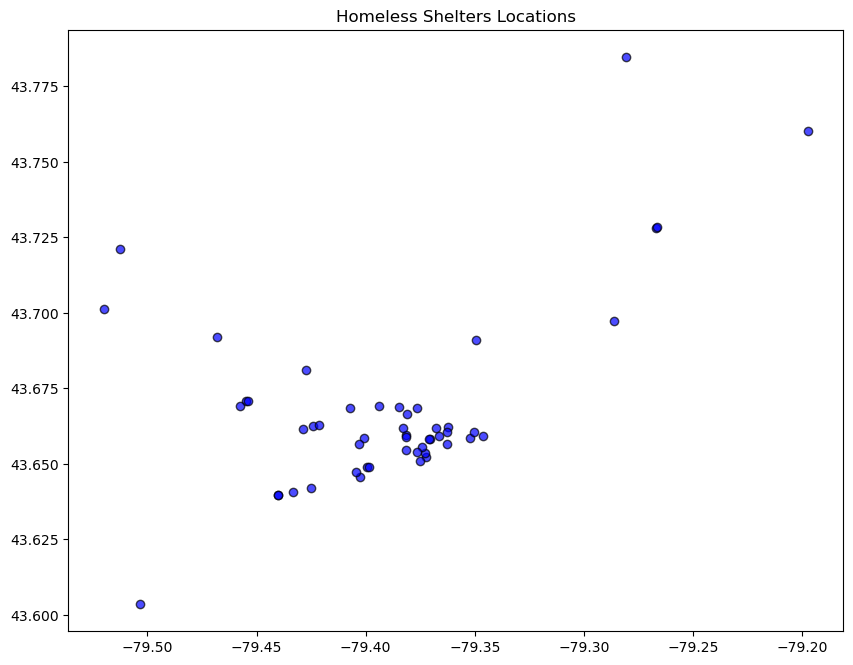

Skipping non-ZIP file: Homeless_Shelters_extracted
Skipping non-ZIP file: Homeless_Shelters_filtered.cpg
Skipping non-ZIP file: Homeless_Shelters_filtered.dbf
Skipping non-ZIP file: Homeless_Shelters_filtered.prj
Skipping non-ZIP file: Homeless_Shelters_filtered.shp
Skipping non-ZIP file: Homeless_Shelters_filtered.shx


In [39]:
# Directory containing the dataset files
output_dir = "toronto_datasets_api"

# Locate the homeless shelters ZIP file
shelters_files = [f for f in os.listdir(output_dir) if "homeless_shelters" in f.lower()]
if not shelters_files:
    raise FileNotFoundError("Homeless shelters file not found in the output directory.")

# Process each file
for shelters_file in shelters_files:
    shelters_file_path = os.path.join(output_dir, shelters_file)
    
    # If the file is a ZIP archive, extract it
    if zipfile.is_zipfile(shelters_file_path):
        try:
            with zipfile.ZipFile(shelters_file_path, 'r') as zip_ref:
                extract_dir = os.path.join(output_dir, "homeless_shelters_extracted")
                zip_ref.extractall(extract_dir)
            print(f"Extracted ZIP file: {shelters_file}")
        except zipfile.BadZipFile:
            print(f"Skipping invalid ZIP file: {shelters_file}")
            continue

        # Locate the shapefile inside the extracted contents
        shapefile = [f for f in os.listdir(extract_dir) if f.endswith(".shp")]
        if not shapefile:
            print("No shapefile found in the extracted ZIP contents.")
            continue
        shapefile_path = os.path.join(extract_dir, shapefile[0])

    # If the file is not a ZIP archive, skip it
    else:
        print(f"Skipping non-ZIP file: {shelters_file}")
        continue

    # Read the shapefile into a GeoDataFrame
    gdf = gpd.read_file(shapefile_path)

    # Display basic information about the data
    print(gdf.info())
    print(gdf.head())

    # Plot the GeoDataFrame to visualize the data
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, color="blue", edgecolor="black", alpha=0.7)
    ax.set_title("Homeless Shelters Locations")
    plt.show()   

We do not need all the information available in dataframe, therefore we will only keep 'FACILITY', 'Address', and 'geometry'. 

                           FACILITY                       Address  \
0    Salvation Army Gateway Shelter                 107 Jarvis St   
1                    Covenant House               20 Gerrard St E   
2  Parliament Street Public Library  269 Gerrard St E - 2nd Floor   
3      WoodGreen Community Services                650 Queen St E   
4                     Sheridan Mall       1700 Wilson Ave - # 114   

                     geometry  
0  POINT (-79.37248 43.65232)  
1   POINT (-79.38144 43.6595)  
2  POINT (-79.36796 43.66184)  
3  POINT (-79.35205 43.65856)  
4  POINT (-79.51253 43.72097)  


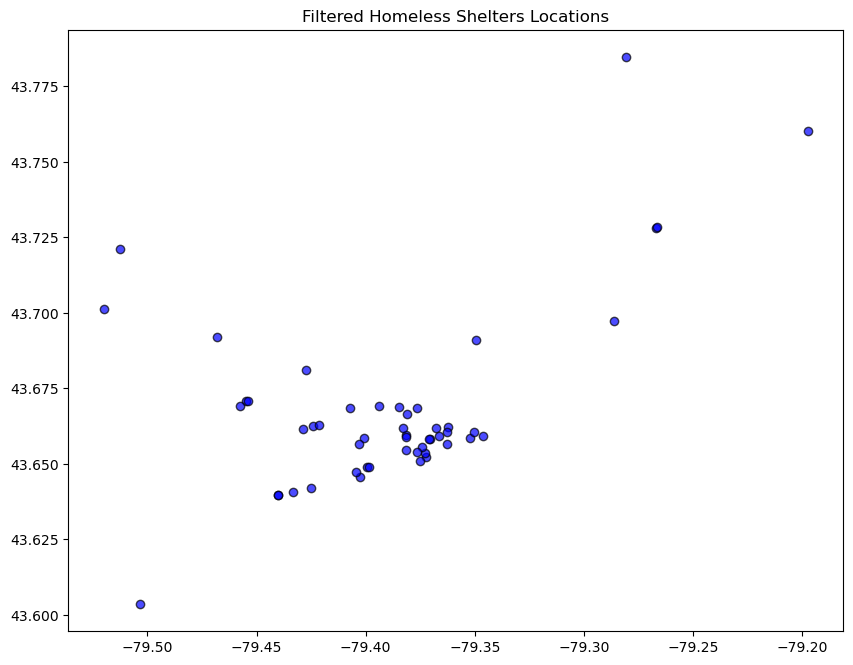

In [40]:
# Filter the columns to keep only the specified ones
filtered_gdf = gdf[['FACILITY', 'Address', 'geometry']]

# Display the filtered GeoDataFrame
print(filtered_gdf.head())

# Save the streamlined GeoDataFrame to a new file (optional)
output_filtered_file = os.path.join(output_dir, "Homeless_Shelters_filtered.shp")
filtered_gdf.to_file(output_filtered_file)

# Visualization (optional)
fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color="blue", edgecolor="black", alpha=0.7)
ax.set_title("Filtered Homeless Shelters Locations")
plt.show()

Before finalizing our handelling of Homeless Shelter data, let's confirm that there are no values missing.

In [41]:
# Check for missing values in the filtered GeoDataFrame
missing_info = filtered_gdf.isnull().sum()
print("Missing values per column:")
print(missing_info)

# Calculate percentage of missing data
missing_percentage = (filtered_gdf.isnull().mean()) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)

# Identify rows with missing values in any column
rows_with_missing = filtered_gdf[filtered_gdf.isnull().any(axis=1)]
print(f"\nNumber of rows with missing values: {len(rows_with_missing)}")

Missing values per column:
FACILITY    0
Address     0
geometry    0
dtype: int64

Percentage of missing values per column:
FACILITY    0.0
Address     0.0
geometry    0.0
dtype: float64

Number of rows with missing values: 0


# Now, it is time to merge the dataframes

First, we need to ensure that collumns can be merged based on geometry.

In [43]:
# Check for geometry column in all GeoDataFrames
geo_dfs = [geocoded_df, neighbourhoods_df_cleaned, parks_df, schools_df, filtered_gdf]
for idx, gdf in enumerate(geo_dfs, start=1):
    if 'geometry' not in gdf.columns:
        print(f"GeoDataFrame {idx} is missing 'geometry' column.")

GeoDataFrame 1 is missing 'geometry' column.


For that we need to make sire that all DataFrames are GeoDataFrames.

In [44]:
for idx, gdf in enumerate(geo_dfs, start=1):
    if not isinstance(gdf, gpd.GeoDataFrame):
        print(f"GeoDataFrame {idx} is not a GeoDataFrame. It is of type {type(gdf)}")


GeoDataFrame 1 is not a GeoDataFrame. It is of type <class 'pandas.core.frame.DataFrame'>
GeoDataFrame 2 is not a GeoDataFrame. It is of type <class 'pandas.core.frame.DataFrame'>
GeoDataFrame 3 is not a GeoDataFrame. It is of type <class 'pandas.core.frame.DataFrame'>
GeoDataFrame 4 is not a GeoDataFrame. It is of type <class 'pandas.core.frame.DataFrame'>


In [45]:
print(neighbourhoods_df_cleaned['geometry'].head())
print(parks_df['geometry'].head())
print(schools_df['geometry'].head())


0    {"type": "MultiPolygon", "coordinates": [[[[-7...
1    {"type": "MultiPolygon", "coordinates": [[[[-7...
2    {"type": "MultiPolygon", "coordinates": [[[[-7...
3    {"type": "MultiPolygon", "coordinates": [[[[-7...
4    {"type": "MultiPolygon", "coordinates": [[[[-7...
Name: geometry, dtype: object
0    {"type": "MultiPoint", "coordinates": [[-79.31...
1    {"type": "MultiPoint", "coordinates": [[-79.49...
2    {"type": "MultiPoint", "coordinates": [[-79.41...
3    {"type": "MultiPoint", "coordinates": [[-79.55...
4    {"type": "MultiPoint", "coordinates": [[-79.38...
Name: geometry, dtype: object
0    {"type": "MultiPoint", "coordinates": [[-79.26...
1    {"type": "MultiPoint", "coordinates": [[-79.32...
2    {"type": "MultiPoint", "coordinates": [[-79.32...
3    {"type": "MultiPoint", "coordinates": [[-79.36...
4    {"type": "MultiPoint", "coordinates": [[-79.31...
Name: geometry, dtype: object


Since not all DataFrames are GeoDataFrames, we need to convert them. 

In [46]:
# Function to parse geometry from GeoJSON-like strings
def parse_geojson_geometry(df):
    if 'geometry' not in df.columns:
        raise ValueError("The DataFrame does not have a 'geometry' column.")
    
    df['geometry'] = df['geometry'].apply(lambda geom: shape(json.loads(geom)) if isinstance(geom, str) else geom)
    return df

In [47]:
from shapely import wkt
import geopandas as gpd

# Helper function to convert a DataFrame to a GeoDataFrame
def convert_to_geodataframe(df, crs="EPSG:4326"):
    if 'geometry' not in df.columns:
        raise ValueError("The DataFrame does not have a 'geometry' column.")
    
    # Convert 'geometry' to valid geometry objects if needed
    if df['geometry'].dtype == object:  # Likely contains WKT strings
        df['geometry'] = df['geometry'].apply(wkt.loads)

    # Create a GeoDataFrame
    return gpd.GeoDataFrame(df, geometry=df['geometry'], crs=crs)

# Convert the problematic DataFrames
try:
    neighbourhoods_df_cleaned = convert_to_geodataframe(neighbourhoods_df_cleaned)
    parks_df = convert_to_geodataframe(parks_df)
    schools_df = convert_to_geodataframe(schools_df)
    print("Converted all DataFrames to GeoDataFrames.")
except Exception as e:
    print(f"Error converting DataFrame: {e}")

Error converting DataFrame: ParseException: Unknown type: '{"TYPE":'


In [48]:
# Parse geometry for each DataFrame
neighbourhoods_df_cleaned = parse_geojson_geometry(neighbourhoods_df_cleaned)
parks_df = parse_geojson_geometry(parks_df)
schools_df = parse_geojson_geometry(schools_df)

In [49]:
# Convert to GeoDataFrame with CRS EPSG:4326
neighbourhoods_gdf = gpd.GeoDataFrame(neighbourhoods_df_cleaned, geometry=neighbourhoods_df_cleaned['geometry'], crs="EPSG:4326")
parks_gdf = gpd.GeoDataFrame(parks_df, geometry=parks_df['geometry'], crs="EPSG:4326")
schools_gdf = gpd.GeoDataFrame(schools_df, geometry=schools_df['geometry'], crs="EPSG:4326")

In [50]:
geo_dfs[1] = neighbourhoods_gdf
geo_dfs[2] = parks_gdf
geo_dfs[3] = schools_gdf

In [51]:
for idx, gdf in enumerate(geo_dfs, start=1):
    if isinstance(gdf, gpd.GeoDataFrame):
        if not gdf.geometry.is_valid.all():
            print(f"Invalid geometries found in GeoDataFrame {idx}.")
            gdf.geometry = gdf.geometry.buffer(0)  # Attempt to fix invalid geometries


In [ ]:
# for gdf in geo_dfs:
#     if gdf.crs != "EPSG:4326":
#         gdf.to_crs("EPSG:4326", inplace=True)

AttributeError: 'DataFrame' object has no attribute 'crs'

Now that our dataframes are ready, we can proceed with merge. 
Goal: Merge the cleaned GeoDataFrames (development_gdf, neighbourhoods_gdf, parks_gdf, schools_gdf, and filtered_gdf) into one cohesive GeoDataFrame.
Logic: Use spatial relationships (e.g., intersections, containment) to join datasets where they share the same geographical areas or points.

In [ ]:
# # Spatial join: Neighbourhoods and Development Applications
# merged_gdf = gpd.sjoin(neighbourhoods_gdf, development_gdf, how="left", predicate="intersects")
# print(f"Shape after merging with Development Applications: {merged_gdf.shape}")

Shape after merging with Development Applications: (21336, 17)


In [ ]:
# # Shape and columns of neighbourhoods_gdf
# print(f"Shape of neighbourhoods_gdf before merge: {neighbourhoods_gdf.shape}")
# print("Columns in neighbourhoods_gdf before merge:")
# print(neighbourhoods_gdf.columns)

# # Sample data
# print("Sample data from neighbourhoods_gdf:")
# print(neighbourhoods_gdf.head())

Shape of neighbourhoods_gdf before merge: (158, 8)
Columns in neighbourhoods_gdf before merge:
Index(['_id', 'AREA_ID', 'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'AREA_NAME',
       'CLASSIFICATION', 'OBJECTID', 'geometry'],
      dtype='object')
Sample data from neighbourhoods_gdf:
   _id  AREA_ID  AREA_SHORT_CODE  AREA_LONG_CODE                  AREA_NAME  \
0    1  2502366              174             174  South Eglinton-Davisville   
1    2  2502365              173             173              North Toronto   
2    3  2502364              172             172         Dovercourt Village   
3    4  2502363              171             171   Junction-Wallace Emerson   
4    5  2502362              170             170         Yonge-Bay Corridor   

                         CLASSIFICATION  OBJECTID  \
0  Not an NIA or Emerging Neighbourhood  17824737   
1  Not an NIA or Emerging Neighbourhood  17824753   
2  Not an NIA or Emerging Neighbourhood  17824769   
3  Not an NIA or Emerging Neighbou

In [53]:
# Saved Cleaned Data to CSV in Folder 'cleaned neighborhood data'
# Define the directory to save the CSV files
save_directory = "Cleaned_neighborhood_csvs"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save each DataFrame to the CSV folder
geocoded_df.to_csv(os.path.join(save_directory, "geocoded_df.csv"), index=False)
neighbourhoods_df_cleaned.to_csv(os.path.join(save_directory, "neighbourhoods_df_cleaned.csv"), index=False)
parks_df.to_csv(os.path.join(save_directory, "parks_df.csv"), index=False)
schools_df.to_csv(os.path.join(save_directory, "schools_df.csv"), index=False)
filtered_gdf.to_csv(os.path.join(save_directory, "filtered_gdf.csv"), index=False)